> From the PO.DAAC Cookbook, to access the GitHub version of the notebook, follow [this link](https://github.com/podaac/tutorials/blob/master/notebooks/HUC%20Feature%20Translation%20Service%20Examples-updated-20210804.ipynb).

# HUC Feature Translation Service (FTS) Examples

This Jupyter Notebook contains examples related to geospatial search using the PO.DAAC *HUC Feature Translation Service (FTS)*, previewing (viusualizing) the queried region of interest, and using FTS results to query data through NASA's Common Metadata Repository (CMR).

**Example Use Case:** 
Check if data is available over my region of interest using HUCs. In this example we are using the FTS-HUC API (https://fts.podaac.earthdata.nasa.gov/) to geospatially define our region of interest, namely the Upper Tuolumne River Basin in the San Joaquin River Basin in California's Sierra Nevada Mountains, searching by HUC or region name, and then using those geospatial bounds (coordinates) to query Sentinel-1 data in CMR.
1. use FTS to define geographic region of interest (query by partial or exact HUC or HUC region name)
2. preview query 
3. use coordinates returned by FTS to query Sentinel-1 data in CMR, by polygon or bounding box.

**Resources**

USGS Hydrologic unit map to help identifiy region of interest (e.g. HUC value or name) can be found here: https://water.usgs.gov/GIS/regions.html 

## Install libraries

In [1]:
%%capture

import sys
!{sys.executable} -m pip install bs4 requests

from bs4 import BeautifulSoup
import requests
import json

## Search Feature Translation Service for Partial Region Matches

If you are unsure what the corresponding HUC is for your region of interest, you can query the FTS for _partial_ region matches, by setting `EXACT = FALSE`.

In [2]:
###################

# Querying partial matches with region "San Joaquin"
# This "partial" match is anything that BEGINS with the region specified.

REGION = "San Jo"
EXACT = False

###################

# Query Feature Translation Service and parse JSON response
r = requests.get("https://fts.podaac.earthdata.nasa.gov/region/{}?exact={}".format(REGION, EXACT))

# Load response from FTS
response = r.json()

# Print all elements in HUC database that partially matches with region "San Jo"
print(json.dumps(response, indent = 4))

{
    "status": "200 OK",
    "time": "11.754 ms.",
    "hits": 11,
    "search on": {
        "parameter": "region",
        "exact": false,
        "polygon_format": "",
        "page_number": 1,
        "page_size": 100
    },
    "results": {
        "San Joaquin": {
            "USGS Polygon": {
                "Object URL": "https://podaac-feature-translation-service.s3-us-west-2.amazonaws.com/180400.zip",
                "Source": "ftp://rockyftp.cr.usgs.gov/vdelivery/Datasets/Staged/Hydrography/WBD/HU2/Shape/WBD_18_HU2_Shape.zip"
            },
            "Bounding Box": "-121.93679916804501,36.36688239563472,-118.65438684397327,38.757297326299295",
            "Convex Hull Polygon": "-120.63835246068544,36.36688239563472,-120.63808719818587,36.3669077091763,-118.73841884071788,37.07942819140368,-118.67420150956752,37.106490572611676,-118.6735564366519,37.10721677469388,-118.66992847311582,37.11265112260213,-118.65448236168146,37.14116804130782,-118.65438684397327,37.141469417

## Search Feature Translation Service for Exact HUC Matches

Here we can set a HUC ID, or hydrologic unit code, and use this to query the HUC FTS. By defining the parameter _EXACT = True_, we tell the query to not search for partial matches.

Based on the partial name response in the previous step, we can now do an exact search for San Joaquin River Basin, using its HUC ID (1804).

In [3]:
###################

# Querying exact matches for HUC "1804" = San Joaquin River Basin

HUC = "1804"
EXACT = True

###################

# Query Feature Translation Service and parse JSON response
r = requests.get("https://fts.podaac.earthdata.nasa.gov/huc/{}?exact={}".format(HUC, EXACT))

# Load response from FTS
response = r.json()

# Print all elements in HUC database that exactly match HUC "1804"
print(json.dumps(response, indent = 4))

{
    "status": "200 OK",
    "time": "2.791 ms.",
    "hits": 1,
    "search on": {
        "parameter": "HUC",
        "exact": true,
        "polygon_format": "",
        "page_number": 1,
        "page_size": 100
    },
    "results": {
        "1804": {
            "USGS Polygon": {
                "Object URL": "https://podaac-feature-translation-service.s3-us-west-2.amazonaws.com/1804.zip",
                "Source": "ftp://rockyftp.cr.usgs.gov/vdelivery/Datasets/Staged/Hydrography/WBD/HU2/Shape/WBD_18_HU2_Shape.zip"
            },
            "Bounding Box": "-121.93679916804501,36.36688239563472,-118.65438684397327,38.757297326299295",
            "Convex Hull Polygon": "-120.63835246068544,36.36688239563472,-120.63808719818587,36.3669077091763,-118.73841884071788,37.07942819140368,-118.67420150956752,37.106490572611676,-118.6735564366519,37.10721677469388,-118.66992847311582,37.11265112260213,-118.65448236168146,37.14116804130782,-118.65438684397327,37.14146941734907,-118.6543

## Search Feature Translation Service for Partial Region Matches

But in this case we are specifically interested in Tuolumne River Basin _within_ the San Joaquin main basin, so let's do a partial search for "Upper Tuo", given we may not know the exact region name.

In [4]:
###################

# Querying partial matches with region "Upper Tuo"
# This "partial" match is anything that BEGINS with the region specified.

REGION = "Upper Tuo"
EXACT = False

###################

# Query Feature Translation Service and parse JSON response
r = requests.get("https://fts.podaac.earthdata.nasa.gov/region/{}?exact={}".format(REGION, EXACT))

# Load response from FTS
response = r.json()

# Print all elements in HUC database that partially matches with region "Upper Tuo"
print(json.dumps(response, indent = 4))

{
    "status": "200 OK",
    "time": "4.244 ms.",
    "hits": 1,
    "search on": {
        "parameter": "region",
        "exact": false,
        "polygon_format": "",
        "page_number": 1,
        "page_size": 100
    },
    "results": {
        "Upper Tuolumne": {
            "USGS Polygon": {
                "Object URL": "https://podaac-feature-translation-service.s3-us-west-2.amazonaws.com/18040009.zip",
                "Source": "ftp://rockyftp.cr.usgs.gov/vdelivery/Datasets/Staged/Hydrography/WBD/HU2/Shape/WBD_18_HU2_Shape.zip"
            },
            "Bounding Box": "-121.17476593797784,37.57291785522102,-119.19927543166921,38.22952896670182",
            "Convex Hull Polygon": "-121.105517801627,37.57291785522102,-120.51777999837259,37.58160878749919,-119.26845687218679,37.73942430183757,-119.26095827844847,37.741190162251485,-119.26079495969867,37.74128122475133,-119.25581474616479,37.7450598684955,-119.25563206491506,37.74520087891193,-119.25521361804067,37.74555517

## Search Feature Translation Service for Exact HUC and Named Region Matches

Given the above response, or that we already know an exact region name or HUC in USGS's Watershed Boundary Dataset (WBD), we can use this instead of a partial search. Below is an example of searching by exact match using HUC ID (e.g. `18040009`), and then by region name ("Upper Tuolumne").

In [5]:
###################

# Querying exact matches with HUC "18040009" = Upper Tuolumne

HUC = "18040009"
EXACT = True

###################

# Query Feature Translation Service and parse JSON response
r = requests.get("https://fts.podaac.earthdata.nasa.gov/huc/{}?exact={}".format(HUC, EXACT))

# Load response from FTS
response = r.json()

# Print all elements in HUC database that exactly match HUC "18040009"
print(json.dumps(response, indent = 4))

{
    "status": "200 OK",
    "time": "2.582 ms.",
    "hits": 1,
    "search on": {
        "parameter": "HUC",
        "exact": true,
        "polygon_format": "",
        "page_number": 1,
        "page_size": 100
    },
    "results": {
        "18040009": {
            "USGS Polygon": {
                "Object URL": "https://podaac-feature-translation-service.s3-us-west-2.amazonaws.com/18040009.zip",
                "Source": "ftp://rockyftp.cr.usgs.gov/vdelivery/Datasets/Staged/Hydrography/WBD/HU2/Shape/WBD_18_HU2_Shape.zip"
            },
            "Bounding Box": "-121.17476593797784,37.57291785522102,-119.19927543166921,38.22952896670182",
            "Convex Hull Polygon": "-121.105517801627,37.57291785522102,-120.51777999837259,37.58160878749919,-119.26845687218679,37.73942430183757,-119.26095827844847,37.741190162251485,-119.26079495969867,37.74128122475133,-119.25581474616479,37.7450598684955,-119.25563206491506,37.74520087891193,-119.25521361804067,37.745555179953044,-1

In [6]:
###################

# Querying exact matches with region "Upper Tuolumne"

REGION = "Upper Tuolumne"
EXACT = True

###################

# Query Feature Translation Service and parse JSON response
# Note the change in endpoint from "/huc" to "/region"
r = requests.get("https://fts.podaac.earthdata.nasa.gov/region/{}?exact={}".format(REGION, EXACT))

# Load response from FTS
response = r.json()

# Print all elements in HUC database that exact matches with region "Upper Tuolumne"
print(json.dumps(response, indent = 4))

{
    "status": "200 OK",
    "time": "2.312 ms.",
    "hits": 1,
    "search on": {
        "parameter": "region",
        "exact": true,
        "polygon_format": "",
        "page_number": 1,
        "page_size": 100
    },
    "results": {
        "Upper Tuolumne": {
            "USGS Polygon": {
                "Object URL": "https://podaac-feature-translation-service.s3-us-west-2.amazonaws.com/18040009.zip",
                "Source": "ftp://rockyftp.cr.usgs.gov/vdelivery/Datasets/Staged/Hydrography/WBD/HU2/Shape/WBD_18_HU2_Shape.zip"
            },
            "Bounding Box": "-121.17476593797784,37.57291785522102,-119.19927543166921,38.22952896670182",
            "Convex Hull Polygon": "-121.105517801627,37.57291785522102,-120.51777999837259,37.58160878749919,-119.26845687218679,37.73942430183757,-119.26095827844847,37.741190162251485,-119.26079495969867,37.74128122475133,-119.25581474616479,37.7450598684955,-119.25563206491506,37.74520087891193,-119.25521361804067,37.745555179

# Visualize the Response from the HUC Feature Translation Service

Below are two examples of how to visualize the response from the Feature Translation Service. Here we provide code that takes a response from the HUC Feature Translation Service, and graphs the associated bounding boxes, convex hull polygons, and Visvalingam-Whyatt polygons.

In [7]:
%%capture

import sys
!{sys.executable} -m pip install geopandas pandas requests shapely numpy
from shapely.geometry import box, Polygon
import matplotlib.pyplot as plt 
import geopandas as gpd
import numpy as np
import requests
import json
import math

## Function for Visualization

Below is a function created specifically to visualize the output of the HUC Feature Translation Service. 

In [8]:
def visualize(fts_response):
    
    regions = []
    bounding_boxes = []
    convex_hull_polygons = []
    visvalingam_polygons = []
    for element in fts_response['results']:
        for heading in fts_response['results'][element]:
            if heading == "Bounding Box":
                bounding_boxes.append([float(e) for e in fts_response['results'][element][heading].split(",")])
            elif heading == "Convex Hull Polygon":
                convex_hull_polygons.append([float(e) for e in fts_response['results'][element][heading].split(",")])
            elif heading == "Visvalingam Polygon":
                visvalingam_polygons.append([float(e) for e in fts_response['results'][element][heading].split(",")])
            elif heading == "HUC":
                regions.append("Region Name: " + element + "\n" + "HUC: " + fts_response['results'][element][heading])
            elif heading == "Region Name":
                regions.append("Region Name: " + fts_response['results'][element][heading] + "\n" + "HUC: " + element)
            else:
                continue

    bounding_boxes = [box(e[0], e[1], e[2], e[3]) for e in bounding_boxes]
    convex_hull_polygons = [Polygon(np.asarray(polygon).reshape(-1,2)) for polygon in convex_hull_polygons]
    visvalingam_polygons = [Polygon(np.asarray(polygon).reshape(-1,2)) for polygon in visvalingam_polygons]
    
    for i in range(len(bounding_boxes)):
        ax = gpd.GeoSeries(bounding_boxes[i]).plot(alpha=0.2, cmap='Pastel1', figsize=(10,10))
        gpd.GeoSeries(convex_hull_polygons[i]).plot(ax = ax, cmap='Pastel2')
        gpd.GeoSeries(visvalingam_polygons[i]).plot(alpha=0.5, ax=ax, cmap='viridis')

        plt.title(regions[i])
        plt.show()
            

## Visualization

We can take that response and pass it to the _visualize()_ function created above. The pink polygon is *Bounding Box*, the green is *Convex Hull Polygon* and the purple color is  *Visvalingam Polygon*

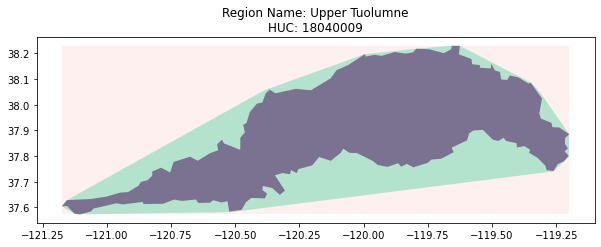

In [9]:
#visualize FTS response
visualize(response)

Here we can visualize the *FTS* response using HUC ID search (18040009) instead of Region search of "Upper Tuolumne". 

In [10]:
###################
# Querying exact matches with HUC "18040009" = Upper Tuolumne

HUC = "18040009"
EXACT = True

###################

# Query Feature Translation Service and parse JSON response
r = requests.get("https://fts.podaac.earthdata.nasa.gov/huc/{}?exact={}".format(HUC, EXACT))

# Load response from FTS
response = r.json()

# Print all elements in HUC database that exactly match HUC "1804"
print(json.dumps(response, indent = 4))

{
    "status": "200 OK",
    "time": "2.61 ms.",
    "hits": 1,
    "search on": {
        "parameter": "HUC",
        "exact": true,
        "polygon_format": "",
        "page_number": 1,
        "page_size": 100
    },
    "results": {
        "18040009": {
            "USGS Polygon": {
                "Object URL": "https://podaac-feature-translation-service.s3-us-west-2.amazonaws.com/18040009.zip",
                "Source": "ftp://rockyftp.cr.usgs.gov/vdelivery/Datasets/Staged/Hydrography/WBD/HU2/Shape/WBD_18_HU2_Shape.zip"
            },
            "Bounding Box": "-121.17476593797784,37.57291785522102,-119.19927543166921,38.22952896670182",
            "Convex Hull Polygon": "-121.105517801627,37.57291785522102,-120.51777999837259,37.58160878749919,-119.26845687218679,37.73942430183757,-119.26095827844847,37.741190162251485,-119.26079495969867,37.74128122475133,-119.25581474616479,37.7450598684955,-119.25563206491506,37.74520087891193,-119.25521361804067,37.745555179953044,-11

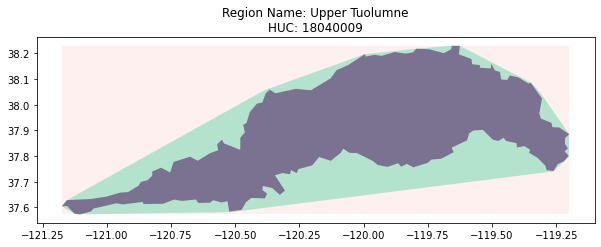

In [11]:
#visualize FTS response
visualize(response)

## Query CMR by Bounding Box

Here is a more useful example of the Feature Translation Service. We can use results obtained from the FTS to then directly and automatically query on data using CMR. We're extracting the bounding box representing Upper Tuolumne River Basin within the San Joaquin River Basin, and using it to search for granules available from the SMAP/Sentinel-1 missions, as an example. 


In [12]:
###################

COLLECTION_ID = "C1931663473-NSIDC_ECS" # SMAP/Sentinel-1 L2 Radiometer/Radar 30-Second Scene 3 km EASE-Grid Soil Moisture V003
REGION = "Upper Tuolumne"

###################

# Query Feature Translation Service and parse JSON response
r = requests.get("https://fts.podaac.earthdata.nasa.gov/region/{}?exact={}".format(REGION, EXACT))

# Load response from FTS
response = r.json()

# Obtain bounding box from response
bbox = response['results'][REGION]['Bounding Box']

# Query CMR by bounding box
# --------- #

cmr_response = requests.get("https://cmr.earthdata.nasa.gov/search/granules.json?bounding_box={}&echo_collection_id={}&pretty=True".format(bbox, COLLECTION_ID))

# --------- #

# Make it look nice
print(json.dumps(cmr_response.json(), indent = 4))

{
    "feed": {
        "updated": "2021-08-04T19:04:43.269Z",
        "id": "https://cmr.earthdata.nasa.gov:443/search/granules.json?bounding_box=-121.17476593797784,37.57291785522102,-119.19927543166921,38.22952896670182&echo_collection_id=C1931663473-NSIDC_ECS&pretty=True",
        "title": "ECHO granule metadata",
        "entry": [
            {
                "producer_granule_id": "SMAP_L2_SM_SP_1AIWDV_20150401T011959_20150401T015854_120W37N_R17000_001.h5",
                "time_start": "2015-04-01T01:20:04.000Z",
                "updated": "2020-12-11T20:16:06.973Z",
                "dataset_id": "SMAP/Sentinel-1 L2 Radiometer/Radar 30-Second Scene 3 km EASE-Grid Soil Moisture V003",
                "data_center": "NSIDC_ECS",
                "title": "SC:SPL2SMAP_S.003:197590772",
                "coordinate_system": "GEODETIC",
                "time_end": "2015-04-01T01:20:44.000Z",
                "id": "G1978082559-NSIDC_ECS",
                "original_format": "ISO-SMAP",

## Query CMR by Polygon

Instead of querying via bounding box from the FTS response, we can extract the polygon of the region and use this to query CMR. Similarly to above, we're extracting information from the Upper Tuolumne River Basin and using this to search for granules available from the Sentinel-1 mission.  

Here we query by _region_ in these two examples, however it would be equally valid to query by _HUC ID_. 

In [13]:

###################

COLLECTION_ID = "C1931663473-NSIDC_ECS" # SMAP/Sentinel-1 L2 Radiometer/Radar 30-Second Scene 3 km EASE-Grid Soil Moisture V003
REGION = "Upper Tuolumne"
EXACT = True

###################

# Query Feature Translation Service and parse JSON response
r = requests.get("https://fts.podaac.earthdata.nasa.gov/region/{}?exact={}".format(REGION, EXACT))

# Load response from FTS
response = r.json()

# Obtain Visvalingam polygon from response
#polygon = response['results'][REGION]['Convex Hull Polygon']
polygon = response['results'][REGION]['Visvalingam Polygon']

# Query CMR by polygon
# --------- #

cmr_response = requests.get("https://cmr.earthdata.nasa.gov/search/granules.json?polygon={}&echo_collection_id={}&pretty=True".format(polygon, COLLECTION_ID))
# --------- #

# Make it look nice
print(json.dumps(cmr_response.json(), indent = 4))

{
    "feed": {
        "updated": "2021-08-04T19:06:13.741Z",
        "id": "https://cmr.earthdata.nasa.gov:443/search/granules.json?polygon=-119.65612154137676,38.229472830243594,-119.65887392887248,38.21611789588928,-119.68748882882807,38.20072575945488,-119.74423195478164,38.21583016359807,-119.79473757241158,38.21799358859471,-119.80777226405803,38.20387888444998,-119.83634931818034,38.19900379279085,-119.8794751608217,38.205164957364616,-119.92926093053609,38.1903575073876,-119.95874486382365,38.194300821964816,-119.9915583491894,38.18745202718378,-119.99491475022586,38.196920114669126,-120.05974666158357,38.15445730952666,-120.10528053234623,38.13442047414111,-120.12843912918527,38.10262073148215,-120.20521266552441,38.056065841971076,-120.26427926855774,38.061807551337154,-120.34283367885251,38.04442165553081,-120.36616220485797,38.05864021280041,-120.38138515275097,38.04379106074015,-120.39399451523144,38.00852514516987,-120.41557226103123,38.00413815246833,-120.4432863495299,

## Check with Earthdata Search

Here we show how to check the CMR response with Earth Data Search. First, let's get the number of granules from CMR response. 

Note that Earthdata Search query data granules (files) by Visvalingam polygon. So make sure to use Visvalingam polygon when query CMR with polygon

In [14]:
number_of_granules=cmr_response.headers['CMR-Hits']
print(number_of_granules)

1325


To find granules in Earth Data Search, we need to first search for the collection. You can search for SMAP/Sentinel to find the Soil Mositure dataset.

![Earthdata_1](Earthdata_1.png)

Earthdata allows you to do an Advanced seach over a HUC region. You can search by HUC ID or HUC region. In our case, let's search for "HUC Region" and "Upper Tuolumne" .

![Earthdata_2](Earthdata_2.png)


Finally, we can locate the total number of granules from the search which matches with the one we identified from CMR.

Also, our search in Earh Data has a unique url with a project ID. This url corresponds to *SMAP/Sentinel Soil Mositure* granules within the Upper Tuolumne: 

https://search.earthdata.nasa.gov/search/granules?projectId=3965468611


![Earthdata_3](Earthdata_3.png)